# Notebook KNN2: Lernverfahren

In diesem Notebook wollen wir ein Modell für einen Datensatz von (x,y)-Punkten finden.
Zudem versuchen wir, ein neuronales Netz die Exponentialfunktion "lernen" zu lassen.

Aktivieren Sie zunächst folgende Zelle, um die nötigen Programmpakete zu laden. 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
!pip install graphviz
!pip install tfgraphviz
import tfgraphviz as tfg
!git clone "https://github.com/Sammy-Jankins/KNN_Lernen.git" "KNN_Lernen" 2> /dev/null || (cd "/KNN_Lernen/" ; git pull)
import KNN_Lernen.KNN_Funktionen as knn

Populating the interactive namespace from numpy and matplotlib
/bin/bash: line 0: cd: /KNN_Lernen/: No such file or directory
fatal: not a git repository (or any of the parent directories): .git


# Datensatz
Der folgende Datensatz besteht aus 30 (x,y)-Paaren. Die x-Werte sind alle ganzen Zahlen von 0 bis 30, die 15 ausgenommen. 

**Unsere Aufgabe: Ein Modell für den Zusammenhang zwischen y und x finden und die y-Werte für x = 15 und x=40 schätzen/vorhersagen.**

Klicken Sie auf 'Play', um die Daten zu plotten. 


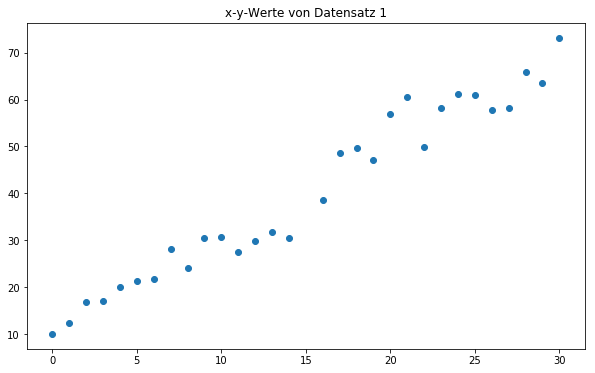

In [4]:
x_Werte = [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.]
y_Werte = [10.01658801, 12.44031689, 16.74158448, 16.99873647, 19.9301948 ,
       21.3662462 , 21.81029917, 28.12350724, 23.99691104, 30.37132938,
       30.7411985 , 27.51173669, 29.86051921, 31.83605475, 30.53806554,
       38.67317334, 48.65172013, 49.65403085, 47.05943994,
       56.90034954, 60.5995608 , 49.83008854, 58.24880042, 61.19101233,
       61.06640885, 57.78297408, 58.12449899, 65.83760744, 63.55813398,
       73.22576714]
plt.title('x-y-Werte von Datensatz 1')
plt.scatter(x_Werte, y_Werte)
plt.show()

Die Grafik legt nahe, dass ein lineares Modell zugrunde liegt, d.h. $y \approx ax + b$. 

**Frage 1:**  Bestimmen Sie die Werte a und b so, dass die rote Gerade möglichst gut passt. Unsere Vorhersage für x=15 bzw. 40 ist dann also a\*15 + b bzw. a\*40 + b. 

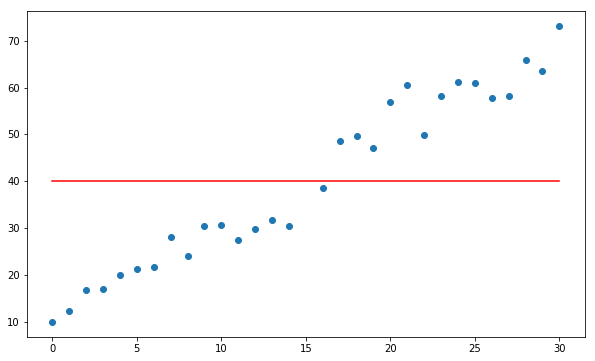

Vorhersage für x = 15: y = 40
Vorhersage für x = 40: y = 40


In [0]:
a = 0
b = 40

y_Gerade = np.multiply(x_Werte, a)
y_Gerade = np.add(y_Gerade, b)
plt.scatter(x_Werte, y_Werte)
plt.plot(x_Werte, y_Gerade, color='red')
plt.show()
print("Vorhersage für x = 15: y = " + str(15 * a + b))
print("Vorhersage für x = 40: y = " + str(40 * a + b))

# Fehlerfunktion

Wir betrachten nun ein neuronales Netz mit zwei Input-Neuronen $o_1, o_2$, einem Output-Neuron $o_{out}$ und der Funktion 
$\phi_{out}(x)=x$. Für die Gewichte schreiben wir kurz $o_{1,out}=a$, $o_{2,out}=b$. Zudem sei $o_2$ ein Bias-Neuron.

Ist nun $x$ der Zustandswert von $o_1$, so erhalten wir die Funktion
$$f(x) = \phi_{out}(a\cdot x + b \cdot 1)=a\cdot x +b.$$


Das KNN soll nun $a$ und $b$ erlernen.

Wir müssen zuerst eine Fehlerfunktion $Fehler(a,b)$ angeben, die von $a$ und $b$ (und den Daten) abhängt. Das KNN soll dann 
$a$ und $b$ so wählen, dass der Fehler minimiert wird (wenn möglich). Im Lernprozess sollen also $a_{min}$ und $b_{min}$ bestimmt werden, so dass 
$$Fehler(a_{min}, b_{min}) \leq Fehler(a,b) $$
für alle anderen Werte für $a$ und $b$. 

**Frage 2:** Welche der folgenden Beispiel-Funktionen für $Fehler(a,b)$ sind für unser Problem angemessen?


*  Variante 1: Mittelwert der Differenzen:
$$Fehler(a,b) = \frac1{30} \sum_{n=1}^{30} (f(x_n) -y_n) = \sum_{n=1}^{30} (a\cdot x_n + b -y_n).$$
* Variante 2: Mittelwert der Quadrate der Differenzen:
$$ Fehler(a,b) = \frac1{30} \sum_{n=1}^{30} (f(x_n) -y_n)^2 = \sum_{n=1}^{30} (a\cdot x_n + b -y_n)^2.$$

* Variante 3: Summe der Quadrate der Differenzen bei zwei Punkten:
$$ Fehler(a,b) = (a\cdot x_1 + b -y_1)^2 + (a\cdot x_{14} + b -y_{14})^2. $$





Im Lernprozess wird versucht, die Funktion Fehler(a,b) zu minimieren, d.h. die optimalen Werte für a und b zu erlernen. Der Lernprozess hängt von folgenden Parametern ab:

1.   Die Fehlerfunktion.
2.   Das Lernverfahren, in diesem Fall das Gradientenverfahren.
3.   Die Lernrate.
4.   Die Anzahl der Iterationen.

**Frage 3:**  Starten Sie den unten angegebenen Code mit den Werten Lernrate = 0.001 und Anzahl_Iterationen = 2000 und Fehlerfunktion = "Variante 1" bzw. "Variante 2" bzw. "Variante 3". Können Sie erklären, was das KNN in jedem dieser Fälle versucht zu "lernen"?

**Frage 4:**  Wählen Sie Fehlerfunktion = "Variante 3". Können Sie 'Lernrate' und 'Anzahl_Iterationen' so verändern, dass der Fehler kleiner als 10^-7 wird?

**Frage 5:**  Starten Sie den unten angegebenen Code mit den Werten Fehlerfunktion = "Variante 2", Lernrate = 0.01 und Anzahl_Iterationen = 20. Wieso konvergiert das Verfahren nicht mehr?
Die optimalen Werte für a und b bei "Variante 2" kann man exakt berechnen. Es ergibt sich $$a =  1,9664075... \quad b =  10,5934486...$$ 
Versuchen Sie, 'Lernrate' und 'Anzahl_Iterationen' so einzustellen, dass Sie diesen optimalen Werten bis auf drei Nachkommastellen nahe kommen.


 
 




In [0]:
Fehlerfunktion = "Variante 2" # mögliche Werte: "Variante 1", "Variante 2", "Variante 3", siehe Skript
Lernrate = 0.000001
Anzahl_Iterationen = 100

### Konstruktion des neuronalen Netzes

y_Vorhersage_x_Werte, a_KNN, b_KNN = knn.KNN3_Lernen_1(x_Werte, y_Werte, Fehlerfunktion, Lernrate, Anzahl_Iterationen)
        
print('\n')
print("Wert für a: " + str(a_KNN[0][0]) + " und für b: " + str(b_KNN[0][0]))
print("Vorhersage für x=15: " + str(15 * a_KNN[0][0] + b_KNN[0][0]))
print("Vorhersage für x=40: " + str(40 * a_KNN[0][0] + b_KNN[0][0]))

plt.scatter(x_Werte, y_Werte)
plt.scatter(x_Werte, y_Vorhersage_x_Werte, color='red')
plt.show()

Zusammenfassung:

In [0]:
##x_Mittel = np.mean(x_Werte)
#y_Mittel = np.mean(y_Werte)
#a_kqs = np.sum((x_Werte - x_Mittel)*(y_Werte-y_Mittel)) / np.sum((x_Werte - x_Mittel)**2)
#b_kqs = y_Mittel - a_kqs * x_Mittel
#print("Optimaler Wert für a: " + str(a_kqs) + " und für b: " + str(b_kqs))


print("Werte für a und b:")
print("Geschätzte Werte:  a = " + str(a) + ", b = " + str(b))
print("Optimaler Wert: a = " + str(1.9664075) + "..., b = " + str(10.5934486)+'...')
print("Neuronales Netz: a = " + str(a_KNN[0][0]) + ", b = " + str(b_KNN[0][0]))
print('\n')


print("Vorhersage für x = 15:")
print("Geschätzter Wert: " + str(a*15+b))
print("Optimale a und b: " + str(40.0895)+'...')
print("Neuronales Netz: " + str(a_KNN[0][0]*15+b_KNN[0][0]))
print('\n')

print("Vorhersage für x = 40:")
print("Geschätzter Wert:  " + str(a*40+b))
print("Optimale a und b: " + str(89.24975)+'...')
print("Neuronales Netz: " + str(a_KNN[0][0]*40+b_KNN[0][0]))


# Approximieren der Exponentialfunktion
Wir betrachten nun als Datensatz Punkte, die exakt auf dem Graphen der Exponentialfunktion liegen.

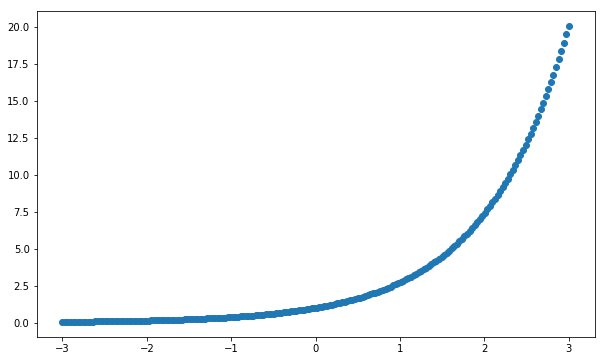

In [0]:
x_Werte_Exp = np.linspace(-3,3,200)
y_Werte_Exp = np.exp(x_Werte_Exp)

plt.scatter(x_Werte_Exp, y_Werte_Exp)
plt.show()

Verändern Sie die Werte für Lernrate, Anzahl_Iterationen, Anzahl_verborgene_Neuronen und Aktivierungsfunktion, so dass die gelernte Funktion einen möglichst kleinen Fehler auf den Trainingsdaten hat (Fehler < 2).

In [0]:
Lernrate = 0.01
Anzahl_Iterationen = 100
Anzahl_verborgene_Neuronen = 5
Aktivierungsfunktion = "Linear" # mögliche Werte: "ReLU", "Sigmoid", "Linear"

y_Vorhersage_x_Wert = knn.KNN3_Lernen_2(x_Werte_Exp, y_Werte_Exp, Lernrate, Anzahl_Iterationen, Anzahl_verborgene_Neuronen, Aktivierungsfunktion)       

plt.scatter(x_Werte_Exp, y_Werte_Exp)
plt.scatter(x_Werte_Exp, y_Vorhersage_x_Werte, color='red')
plt.show()

maxi = 0
for j in range(len(x_Werte_Exp)):
    maxi = max(maxi, np.abs(y_Werte_Exp[j]-y_Vorhersage_x_Werte[j]))
print("Der Approximationsfehler beträgt: " + str("{:.4f}".format(maxi[0])))
if maxi < 2:
    print("Der Fehler ist < 2, Glückwunsch!")
else:
    print("Leider ist der Fehler > 2 :(")

**Frage 6:** Ändern Sie in der vorletzten Code-Zelle den Befehl *y_Werte_Exp = np.exp(x_Werte_Exp)* zu *y_Werte_Exp = np.sin(x_Werte_Exp)* ab und lassen Sie Ihr KNN die neuen Daten trainieren.



# Trainings- und Testdaten

Im Allgemeinen teilt man die zur Verfügung stehenden Daten in Trainingsdaten und Testdaten auf. Z.B. könnten wir die folgende Aufteilung wählen: 

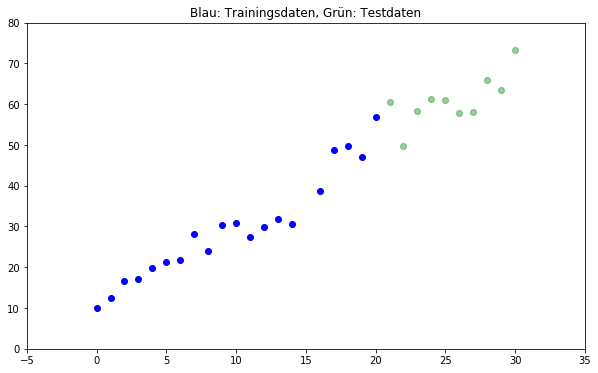

In [15]:
x_train = x_Werte[0:20]
x_test = x_Werte[20:30]
y_train = y_Werte[0:20]
y_test = y_Werte[20:30]
plt.xlim(-5,35)
plt.ylim(0,80)
plt.title('Blau: Trainingsdaten, Grün: Testdaten')
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, alpha=0.4, color='green')
plt.show()

Nun trainiert man das KNN nur mit Hilfe der Trainingsdaten und verwendet den Fehler auf den Testdaten als Gütemaß. Die Testdaten simulieren neue Daten, wie sie in der praktischen Anwendung auftreten könnten. 

Wenn der Fehler nur auf den Trainingsdaten sehr klein ist, kann der Fehler auf den Testdaten immer noch sehr groß sein und das KNN hätte sich 'überangepasst' (overfitting). Man denke an folgendes Beispiel:


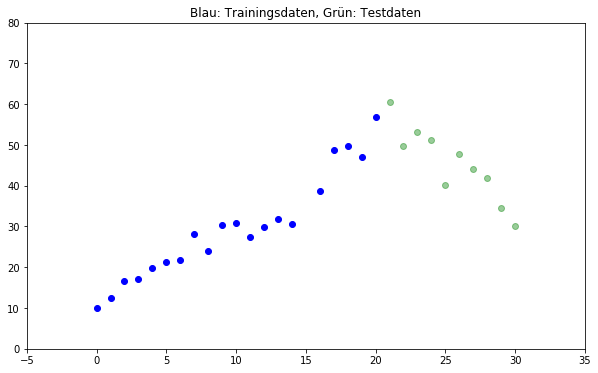

In [16]:
x_train = x_Werte[0:20]
x_test = x_Werte[20:30]
y_train = y_Werte[0:20]
y_test = [60.5995608 , 49.83008854, 53.24880042, 51.19101233,
       40.06640885, 47.78297408, 44.12449899, 41.83760744, 34.55813398,
       30.22576714]
plt.xlim(-5,35)
plt.ylim(0,80)
plt.title('Blau: Trainingsdaten, Grün: Testdaten')
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, alpha=0.4, color='green')
plt.show()

